Exemplo 1 Matriz de Distâncias

In [23]:
#Bibliotecas necessárias
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances


# local do arquivo
Caminho='C:/_Academico/PUC/Ciência de Dados I/Distancia.xlsx'



In [27]:
# Matriz de distância
df =  pd.read_excel(Caminho)
df.head()

,Cidade,ARACAJÚ,BELÉM,BELO HORIZONTE,BRASÍLIA,CAMPO GRANDE,CUIABÁ,CURITIBA,FLORIANÓPOLIS,FORTALEZA,...,PORTO ALEGRE,PORTO VELHO,RECIFE,RIO BRANCO,RIO DE JANEIRO,SALVADOR,SÃO LUÍS,SÃO PAULO,TERESINA,VITÓRIA
0,ARACAJÚ,0,2079,1578,1650,2764,2773,2595,2892,1183,...,3296,4229,501,4763,1855,356,1578,2188,1142,1408
1,BELÉM,2079,0,2824,2140,2942,2941,3193,3500,1611,...,3854,4397,2074,4931,3250,2100,806,2933,947,3108
2,BELO HORIZONTE,1578,2824,0,741,1453,1594,1004,1301,2528,...,1712,3050,2061,3584,434,1372,2738,586,2302,524
3,BRASÍLIA,1650,2140,741,0,1134,1133,1366,1673,2208,...,2027,2589,2135,3123,1148,1446,2157,1015,1789,1238
4,CAMPO GRANDE,2764,2942,1453,1134,0,694,991,1298,3407,...,1518,2150,3247,2684,1444,2568,2979,1014,2911,1892


In [28]:

df = df.set_index('Cidade')
# Extraia as cidades (rótulos) e a matriz de distância dos dados do DataFrame
cidades = df.index
matriz_distancia = df.values
print(matriz_distancia)

[[   0 2079 1578 1650 2764 2773 2595 2892 1183 1849  611  294 5215  788
  3296 4229  501 4763 1855  356 1578 2188 1142 1408]
 [2079    0 2824 2140 2942 2941 3193 3500 1611 2017 2161 2173 5298 2108
  3854 4397 2074 4931 3250 2100  806 2933  947 3108]
 [1578 2824    0  741 1453 1594 1004 1301 2528  906 2171 1854 3951 2348
  1712 3050 2061 3584  434 1372 2738  586 2302  524]
 [1650 2140  741    0 1134 1133 1366 1673 2208  209 2245 1928 3490 2422
  2027 2589 2135 3123 1148 1446 2157 1015 1789 1238]
 [2764 2942 1453 1134    0  694  991 1298 3407  935 3357 3040 3051 3537
  1518 2150 3247 2684 1444 2568 2979 1014 2911 1892]
 [2773 2941 1594 1133  694    0 1679 1986 3406  934 3366 3049 2357 3543
  2206 1456 3256 1990 2017 2567 2978 1614 2910 2119]
 [2595 3193 1004 1366  991 1679    0  300 3541 1186 3188 2871 4036 3365
   711 3135 3078 3669  852 2385 3230  408 3143 1300]
 [2892 3500 1301 1673 1298 1986  300    0 3838 1493 3485 3168 4343 3662
   476 3442 3375 3976 1144 2682 3537  705 3450 1597]


In [46]:
# Realiza o escalonamento multidimensional (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed') # aqui a distância está precomputada
low_dim_data = mds.fit_transform(matriz_distancia)


In [47]:

# Calcula o Stress manualmente
orig_distances = matriz_distancia.flatten()
low_dim_distances = pairwise_distances(low_dim_data, metric='euclidean').flatten()
stress = np.sqrt(np.sum((orig_distances - low_dim_distances)**2) / np.sum(orig_distances**2))
print(stress)

0.05124089162520962


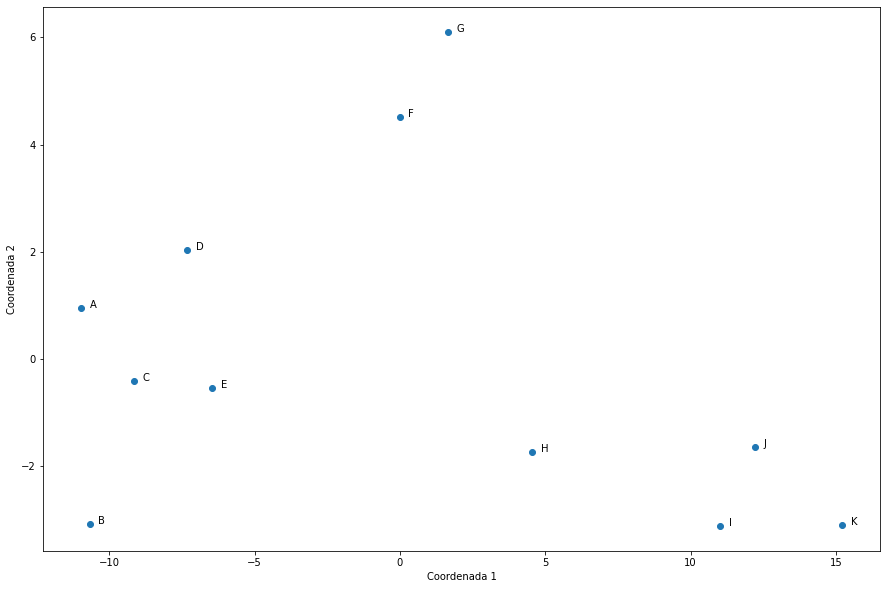

TypeError: 'NoneType' object is not callable

In [55]:

plt.figure(figsize=(15,10))
#Cria Scatter Plot
plt.scatter(low_dim_data[:,0], low_dim_data[:,1])

#Adiciona os eixos
plt.xlabel('Coordenada 1')
plt.ylabel('Coordenada 2')

#Coloca os labels
for i, txt in enumerate(df.index):
    plt.annotate(txt, (low_dim_data[:,0][i]+.3, low_dim_data[:,1][i]))

#display scatterplot
plt.show()(txt, (low_dim_data[:,0][i]+.3, low_dim_data[:,1][i]))
plt.show()

Exemplo 2 Tabela de variáveis

In [48]:
import pandas as pd

#create DataFrane
df = pd.DataFrame({'player': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
                   'points': [4, 4, 6, 7, 8, 14, 16, 19, 25, 25, 28],
                   'assists': [3, 2, 2, 5, 4, 8, 7, 6, 8, 10, 11],
                   'blocks': [7, 3, 6, 7, 5, 8, 8, 4, 2, 2, 1],
                   'rebounds': [4, 5, 5, 6, 5, 8, 10, 4, 3, 2, 2]})

#set player column as index column
df = df.set_index('player')

#view Dataframe
print(df)

        points  assists  blocks  rebounds
player                                   
A            4        3       7         4
B            4        2       3         5
C            6        2       6         5
D            7        5       7         6
E            8        4       5         5
F           14        8       8         8
G           16        7       8        10
H           19        6       4         4
I           25        8       2         3
J           25       10       2         2
K           28       11       1         2


In [50]:
# Realiza o escalonamento multidimensional (MDS)
mds = MDS(n_components=2, dissimilarity='euclidean') #aqui vamos calcular a distancia euclidiana
low_dim_data = mds.fit_transform(df)


In [52]:
# Calcula o Stress manualmente
orig_distances = pairwise_distances(df, metric='euclidean').flatten()
low_dim_distances = pairwise_distances(low_dim_data, metric='euclidean').flatten()
stress = np.sqrt(np.sum((orig_distances - low_dim_distances)**2) / np.sum(orig_distances**2))
print(stress)

0.019546228419997865


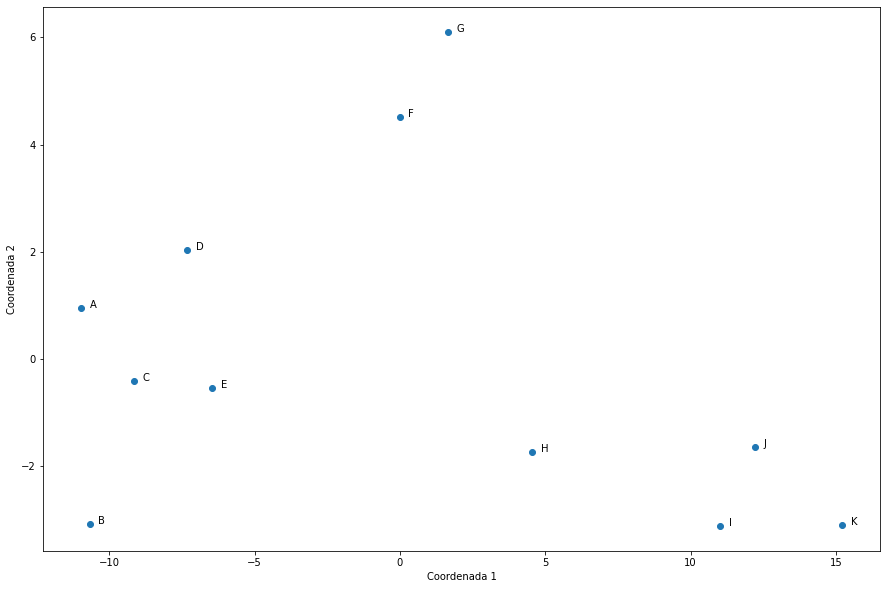

TypeError: 'NoneType' object is not callable

In [56]:

plt.figure(figsize=(15,10))
#Cria Scatter Plot
plt.scatter(low_dim_data[:,0], low_dim_data[:,1])

#Adiciona os eixos
plt.xlabel('Coordenada 1')
plt.ylabel('Coordenada 2')

#Coloca os labels
for i, txt in enumerate(df.index):
    plt.annotate(txt, (low_dim_data[:,0][i]+.3, low_dim_data[:,1][i]))

#display scatterplot
plt.show()(txt, (low_dim_data[:,0][i]+.3, low_dim_data[:,1][i]))
plt.show()

Exemplo 3 Matriz de similaridade

In [58]:
#Bibliotecas necessárias
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics import euclidean_distances


# local do arquivo
Caminho='C:/_Academico/PUC/Ciência de Dados I/Paises.xlsx'

In [59]:
# Matriz de similaridade
df =  pd.read_excel(Caminho)
df.head()

,Pais,BRA,COM,CUB,EGI,FRA,IND,ISR,JAP,CHI,URSS,EUA,IUG
0,BRA,0.00,4.83,5.28,3.44,4.72,4.50,3.83,3.50,2.39,3.06,5.39,3.17
1,COM,4.83,0.00,4.56,5.00,4.00,4.83,3.33,3.39,4.00,3.39,2.39,3.50
2,CUB,5.28,4.56,0.00,5.17,4.11,4.00,3.61,2.94,5.50,5.44,3.17,5.11
3,EGI,3.44,5.00,5.17,0.00,4.78,5.83,4.67,3.83,4.39,4.39,3.33,4.28
4,FRA,4.72,4.00,4.11,4.78,0.00,3.44,4.00,4.22,3.67,5.06,5.94,4.72


In [62]:

df = df.set_index('Pais')
Paises = df.index

#Temos que inverter para obter a matriz de similaridade, segundo  o enunciado a nota ia de 1 a 9, logo vamos subtrair cada valor da nota máxima.

matriz_distancia = 9-df.values
print(matriz_distancia)

[[9.   4.17 3.72 5.56 4.28 4.5  5.17 5.5  6.61 5.94 3.61 5.83]
 [4.17 9.   4.44 4.   5.   4.17 5.67 5.61 5.   5.61 6.61 5.5 ]
 [3.72 4.44 9.   3.83 4.89 5.   5.39 6.06 3.5  3.56 5.83 3.89]
 [5.56 4.   3.83 9.   4.22 3.17 4.33 5.17 4.61 4.61 5.67 4.72]
 [4.28 5.   4.89 4.22 9.   5.56 5.   4.78 5.33 3.94 3.06 4.28]
 [4.5  4.17 5.   3.17 5.56 9.   4.89 4.5  4.89 4.5  4.72 5.  ]
 [5.17 5.67 5.39 4.33 5.   4.89 9.   4.17 6.   4.83 3.06 4.56]
 [5.5  5.61 6.06 5.17 4.78 4.5  4.17 9.   4.83 4.39 2.94 4.72]
 [6.61 5.   3.5  4.61 5.33 4.89 6.   4.83 9.   4.28 6.44 3.94]
 [5.94 5.61 3.56 4.61 3.94 4.5  4.83 4.39 4.28 9.   4.   2.33]
 [3.61 6.61 5.83 5.67 3.06 4.72 3.06 2.94 6.44 4.   9.   5.44]
 [5.83 5.5  3.89 4.72 4.28 5.   4.56 4.72 3.94 2.33 5.44 9.  ]]


In [69]:
# Realiza o escalonamento multidimensional (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed') # aqui a distância está precomputada
low_dim_data = mds.fit_transform(matriz_distancia)


In [70]:
# Calcula o Stress manualmente
orig_distances = matriz_distancia.flatten()
low_dim_distances = pairwise_distances(low_dim_data, metric='euclidean').flatten()
stress = np.sqrt(np.sum((orig_distances - low_dim_distances)**2) / np.sum(orig_distances**2))
print(stress)

0.5354853378658329


IndexError: index 4 is out of bounds for axis 0 with size 4

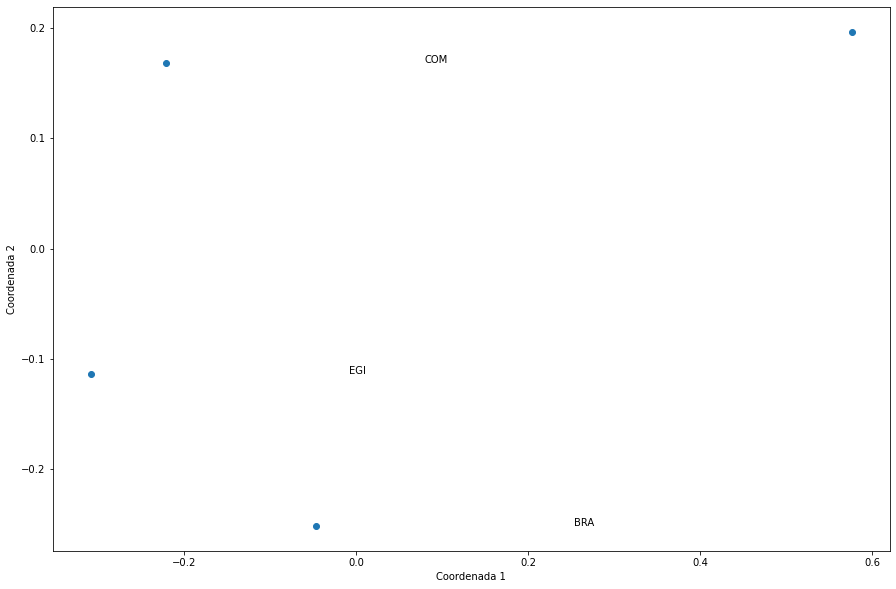

In [83]:

plt.figure(figsize=(15,10))
#Cria Scatter Plot
plt.scatter(low_dim_data[:,0], low_dim_data[:,1])

#Adiciona os eixos
plt.xlabel('Coordenada 1')
plt.ylabel('Coordenada 2')

#Coloca os labels
for i, txt in enumerate(df.index):
    plt.annotate(txt, (low_dim_data[:,0][i]+.3, low_dim_data[:,1][i]))

#display scatterplot
plt.show()(txt, (low_dim_data[:,0][i]+.3, low_dim_data[:,1][i]))
plt.show()

Exemplo 4 Matriz de Presença/ausência

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances


In [76]:
# matriz de presença/ausência (binária)
dados_binarios = np.array([[1, 0, 1, 0],
                           [0, 1, 1, 0],
                           [1, 1, 0, 1],
                           [0, 0, 1, 0]])
rotulos = ['A', 'B', 'C', 'D'] 

In [77]:
# Realiza o escalonamento multidimensional (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed')
distancias = pairwise_distances(dados_binarios, metric='hamming')  # Use Hamming para dados binários
low_dim_data = mds.fit_transform(distancias)

In [80]:
# Calcula o Stress manualmente
orig_distances = distancias.flatten()
low_dim_distances = pairwise_distances(low_dim_data, metric='euclidean').flatten()
stress = np.sqrt(np.sum((orig_distances - low_dim_distances)**2) / np.sum(orig_distances**2))

print (stress)

0.07117531054441242


Text(0, 0.5, 'Dimensão 2')

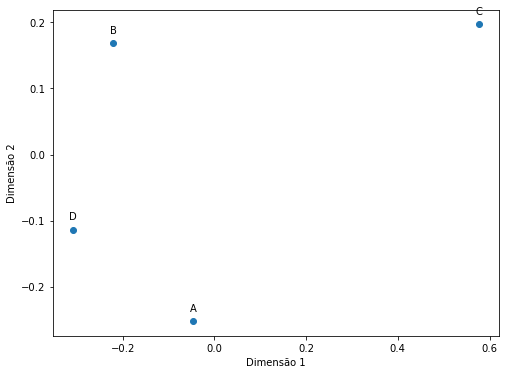

In [82]:
# Gera um gráfico de dispersão com rótulos
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_data[:, 0], low_dim_data[:, 1])

# Adiciona rótulos aos pontos no gráfico
for i, label in enumerate(rotulos):
    plt.annotate(label, (low_dim_data[i, 0], low_dim_data[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')